# Описание тестового стенда

Измерения проводились на ноутбуке HP Laptop 15s-eq2xxx:
- ОС: Ubuntu 22.04;
- Процессор: AMD Ryzen 5 5500U with Radeon Graphics, 2100 МГц, ядер: 6, логических процессоров: 12;
- ОЗУ: 8Гб.

Были закрыты все приложения, был подключен к питанию ноутбук, сделан bash-скрипт, который чистил кэш и запускал программу на данных. Программа была скомпилирована в release mode (dotnet build -c release)

# Датасет

In [4]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

In [6]:
with open("measure2.txt") as file:
    t = [int(x) for x in file]
print(t)


[6726, 6704, 6676, 6720, 6634, 6704, 6673, 6616, 6809, 6799, 6593, 6746, 6817, 6584, 6768, 6535, 6688, 6638, 6585, 6847, 6492, 6858, 6620, 6695, 6919, 6651, 6757, 6768, 6693, 6942, 6542, 6521, 6783, 6842, 6897, 6844, 6741, 6834, 6728, 6741]


# Гистограмма

(array([3., 1., 5., 3., 7., 7., 4., 6., 1., 3.]),
 array([6492., 6537., 6582., 6627., 6672., 6717., 6762., 6807., 6852.,
        6897., 6942.]),
 <BarContainer object of 10 artists>)

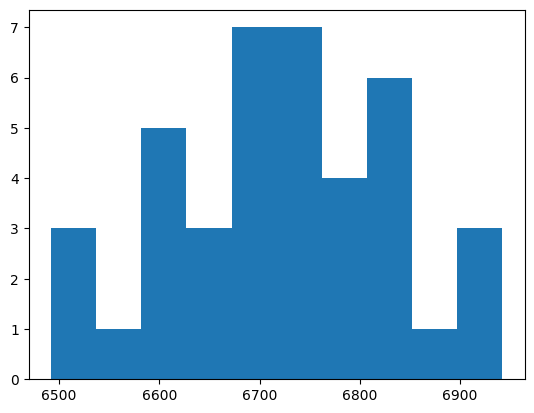

In [7]:
plt.hist(t)

# Нормальность

In [8]:
normaltest = stats.normaltest(t)
shapirotest = stats.shapiro(t)
print(f'Normaltest p-value: {normaltest[1]}')
print(f'Shapirotest p-value: {shapirotest[1]}')
if normaltest[1] > 0.05 or shapirotest[1]:
    print("Тест на нормальность пройден (p-value > 0.05 хоть на одном из тестов)")
else: 
    print("Тест на нормальность не пройден (p-value < 0.05 на обоих тестах)")

Normaltest p-value: 0.7003051994767229
Shapirotest p-value: 0.9192428588867188
Тест на нормальность пройден (p-value > 0.05 хоть на одном из тестов)


# Среднее и стандартное отклонение

In [9]:
mean = np.mean(t)
print(f'Среднее: {mean}')

Среднее: 6718.25


In [10]:
std = np.std(t, ddof=1)
print(f'Стандартное отклонение: {std}')

Стандартное отклонение: 112.17791500729818


In [11]:
print(f'Стандартное отклонение {round(std/mean * 100)}% от среднего')

Стандартное отклонение 2% от среднего


# Доверительный интервал

In [19]:
conf = stats.t.ppf(0.975, df=len(t)-1)*stats.sem(t)
print(f'Погрешность: {conf}')

Погрешность: 35.876237567723756


In [20]:
rounded_conf = round(conf, -1) / 1000
print(f'Округленный доверительный интервал (в секундах): {rounded_conf}')
rounded_mean_conf = round(mean, -1) / 1000
print(f'Округленное среднее (в секундах): {rounded_mean_conf}')
print(f'95% Доверительный интервал: {rounded_mean_conf} +- {rounded_conf}')

Округленный доверительный интервал (в секундах): 0.04
Округленное среднее (в секундах): 6.72
95% Доверительный интервал: 6.72 +- 0.04


# Предсказывающий интервал


In [21]:
pred = std * 2
print(f'Погрешность: {pred}')

Погрешность: 224.35583001459636


In [22]:
rounded_pred = round(pred, -2) / 1000
print(f'Округленный предсказывающий интервал (в секундах): {rounded_pred}')
rounded_mean_pred = round(mean, -2) / 1000
print(f'Округленное среднее (в секундах): {rounded_mean_pred}')
print(f'95% Предсказывающий интервал: {rounded_mean_pred} +- {rounded_pred}')

Округленный предсказывающий интервал (в секундах): 0.2
Округленное среднее (в секундах): 6.7
95% Предсказывающий интервал: 6.7 +- 0.2
